# Lista de exercícios 1C – Sinais e sistemas digitais - DTFT (resolução)

**Definições das funções impseq, stepseq, sigadd, sigmult, sigshift, sigfold utilizadas nos códigos**

In [1]:
import numpy as np

def impseq(n0,n1,n2):

    #      Generates x(n) = delta(n-n0); n1 <= n <= n2
    #      ----------------------------------------------
    #      [x,n] = impseq(n0,n1,n2)
    #

    n=np.array(range(n1,n2+1))
    x = n-n0
    for i in range(len(x)):
        if x[i]!=0: x[i]=0
        else: x[i]=1
    #x = (n-n0) == 0
    return [x,n]

def stepseq(n0,n1,n2):
    #     Generates x(n) = u(n-n0); n1 <= n <= n2
    #     ------------------------------------------
    #     [x,n] = stepseq(n0,n1,n2)
    #
    n=np.arange(n1,n2+1)
    x = n-n0
    for i in range(len(x)):
        if x[i]<0: x[i]=0
        else: x[i]=1
    #x = [(n-n0) >= 0]
    return [x,n]

def  sigadd(x1,n1,x2,n2):
    # % implements y(n) = x1(n)+x2(n)
    # % -----------------------------
    # % [y,n] = sigadd(x1,n1,x2,n2)
    # % y = sum sequence over n, which includes n1 and n2
    # % x1 = first sequence over n1
    # % x2 = second sequence over n2 (n2 can be different from n1)
    # %
    n = np.arange(min(n1.min(0),n2.min(0)),max(n1.max(0),n2.max(0))+1) # duration of y(n)
    y1 = np.zeros((1,len(n)))  #initialization
    y1=y1[0,:]
    y2 = y1.copy()
    y1[np.nonzero(np.logical_and((n>=n1.min(0)),(n<=n1.max(0)))==1)]=x1.copy()
    y2[np.nonzero(np.logical_and((n>=n2.min(0)),(n<=n2.max(0)))==1)]=x2.copy()
    y = y1+y2;
    return [y,n]


def  sigmult(x1,n1,x2,n2):
    # % implements y(n) = x1(n)*x2(n)
    # % -----------------------------
    # % [y,n] = sigmult(x1,n1,x2,n2)
    # % y = product sequence over n, which includes n1 and n2
    # % x1 = first sequence over n1
    # %
    n = np.arange(min(n1.min(0),n2.min(0)),max(n1.max(0),n2.max(0))+1) # duration of y(n)
    y1 = np.zeros((1,len(n)))  #initialization
    y1=y1[0,:]
    y2 = y1.copy()
    y1[np.nonzero(np.logical_and((n>=n1.min(0)),(n<=n1.max(0)))==1)]=x1.copy()
    y2[np.nonzero(np.logical_and((n>=n2.min(0)),(n<=n2.max(0)))==1)]=x2.copy()
    y = y1*y2
    return [y,n]


def sigshift(x,m,k):
    # % implements y(n) = x(n-k)
    # % -------------------------
    # % [y,n] = sigshift(x,m,k)
    # %
    n = m+k
    y = x.copy()
    return [y,n]


def sigfold(x,n):
    # % implements y(n) = x(-n)
    # % -----------------------
    # % [y,n] = sigfold(x,n)
    # %
    y = np.flip(x)
    n = -np.flip(n)
    return [y,n]

def conv_m(x,nx,h,nh):
    # Modified convolution routine for signal processing
    # --------------------------------------------------
    # [y,ny] = conv_m(x,nx,h,nh)
    # [y,ny] = convolution result
    # [x,nx] = first signal
    # [h,nh] = second signal
    #
    nyb = nx[0]+nh[0]
    nye = nx[len(x)-1] + nh[len(h)-1]
    ny = np.arange(nyb,nye+1)
    y = np.convolve(x,h)
    return [y,ny]


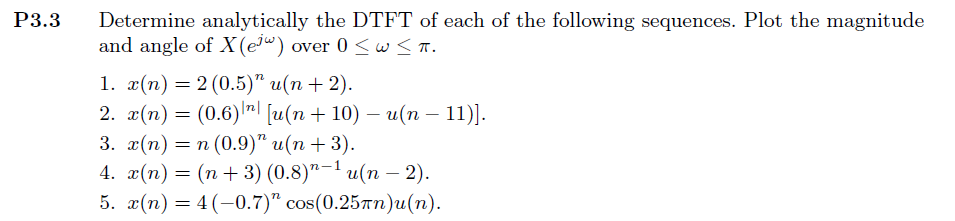

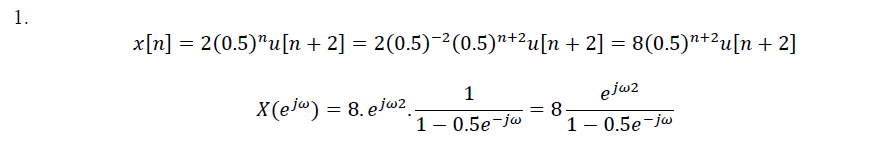

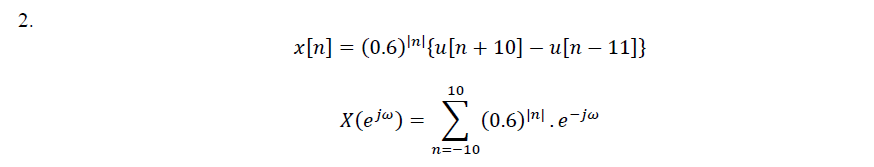

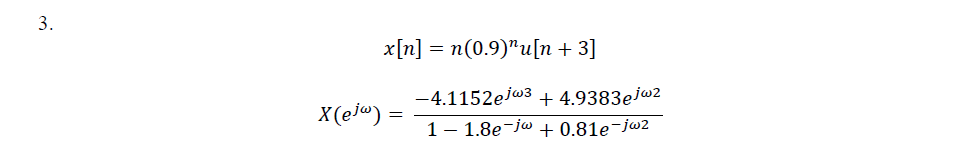

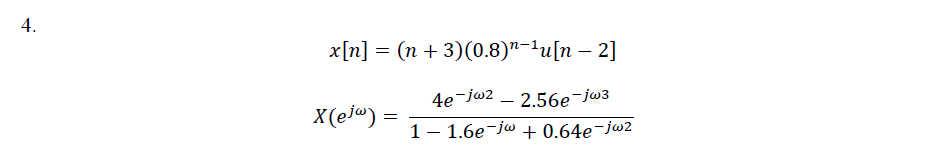

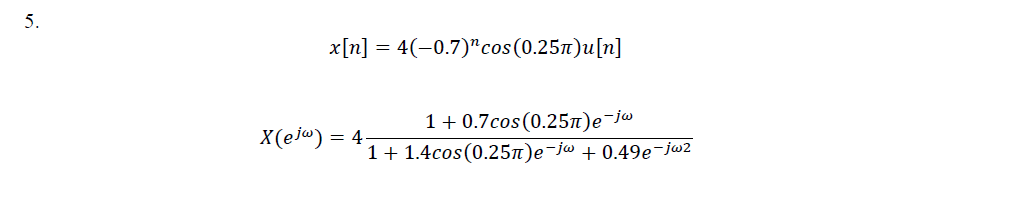

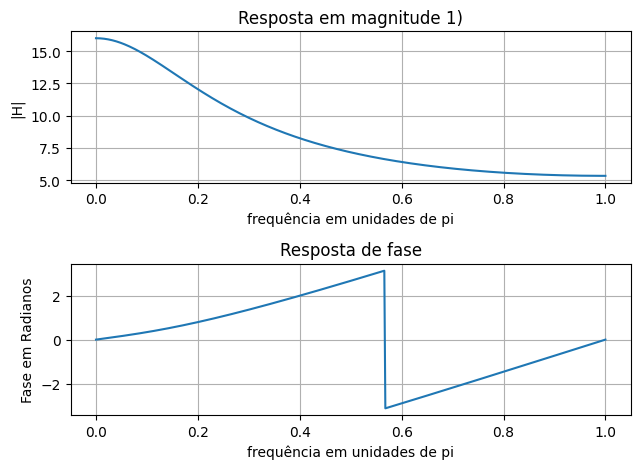

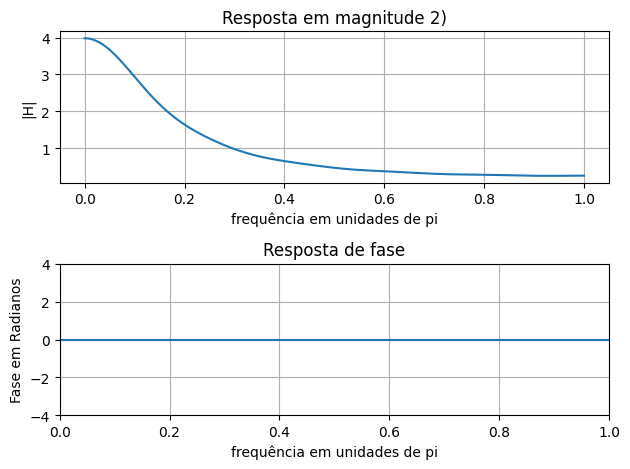

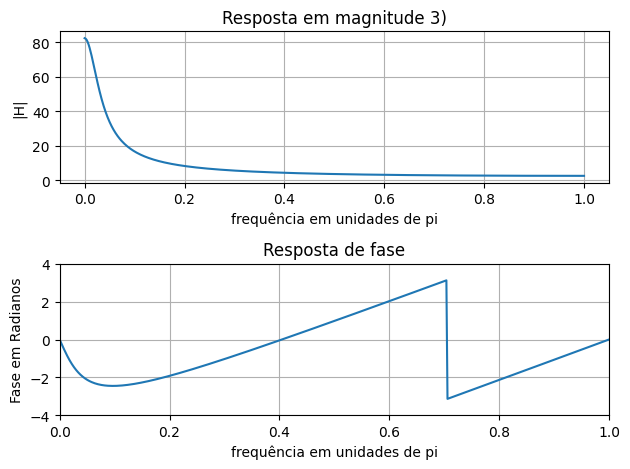

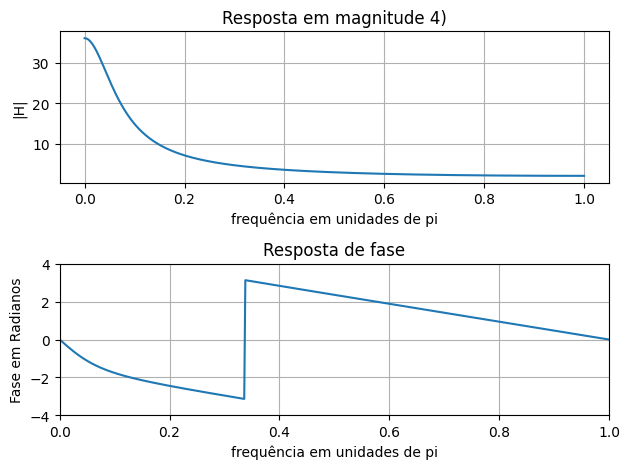

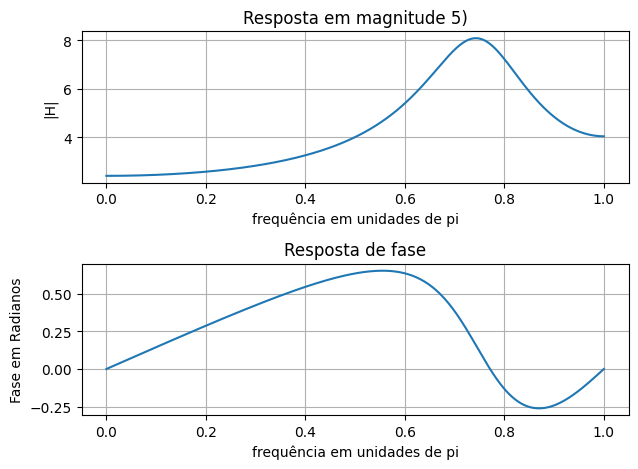

In [2]:
import matplotlib.pyplot as plt
#from fDSP import impseq,stepseq,sigadd,sigmult,sigshift,sigfold
import numpy as np

# exercicio P3.3


# 1)

w = np.arange(0,501)*np.pi/500  # [0, pi] axis divided into 501 points
X = 8*np.exp(1j*w*2) / (np.ones(501)-0.5*np.exp(-1j*w))

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("Resposta em magnitude 1)")
axs[0].plot(w/np.pi,np.abs(X))
axs[0].grid()
axs[0].set_xlabel("frequência em unidades de pi")
axs[0].set_ylabel('|H|')

axs[1].set_title("Resposta de fase")
axs[1].plot(w/np.pi,np.angle(X))
axs[1].grid()
axs[1].set_xlabel("frequência em unidades de pi")
axs[1].set_ylabel('Fase em Radianos')

fig.tight_layout()

# 2)

n = np.arange(-10,11)
x = 0.6**abs(n)      # sequence x(n)
k = np.arange(0,501)
w = (np.pi/500)*k       # [0, pi] axis divided into 501 points

X = [x] @ ((np.exp(-1j*np.pi/500)) ** (np.transpose([n])@[k]))
X=X[0]

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("Resposta em magnitude 2)")
axs[0].plot(w/np.pi,np.abs(X))
axs[0].grid()
axs[0].set_xlabel("frequência em unidades de pi")
axs[0].set_ylabel('|H|')

axs[1].set_title("Resposta de fase")
axs[1].plot(w/np.pi,np.angle(X))
axs[1].grid()
axs[1].set_xlabel("frequência em unidades de pi")
axs[1].set_ylabel('Fase em Radianos')
axs[1].axis([0, 1, -4, 4])

fig.tight_layout()

# 3)

w = np.arange(0,501)*np.pi/500  # [0, pi] axis divided into 501 points
X = (-4.1152*np.exp(1j*w*3)+4.9383*np.exp(1j*w*2)) / (np.ones(501)-1.8*np.exp(-1j*w)+0.81*np.exp(-1j*w*2))

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("Resposta em magnitude 3)")
axs[0].plot(w/np.pi,np.abs(X))
axs[0].grid()
axs[0].set_xlabel("frequência em unidades de pi")
axs[0].set_ylabel('|H|')

axs[1].set_title("Resposta de fase")
axs[1].plot(w/np.pi,np.angle(X))
axs[1].grid()
axs[1].set_xlabel("frequência em unidades de pi")
axs[1].set_ylabel('Fase em Radianos')
axs[1].axis([0, 1, -4, 4])

fig.tight_layout()


# 4)

w = np.arange(0,501)*np.pi/500  # [0, pi] axis divided into 501 points
X = (4*np.exp(-1j*w*2)-2.56*np.exp(-1j*w*3)) / (np.ones(501)-1.6*np.exp(-1j*w)+0.64*np.exp(-1j*w*2))

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("Resposta em magnitude 4)")
axs[0].plot(w/np.pi,np.abs(X))
axs[0].grid()
axs[0].set_xlabel("frequência em unidades de pi")
axs[0].set_ylabel('|H|')

axs[1].set_title("Resposta de fase")
axs[1].plot(w/np.pi,np.angle(X))
axs[1].grid()
axs[1].set_xlabel("frequência em unidades de pi")
axs[1].set_ylabel('Fase em Radianos')
axs[1].axis([0, 1, -4, 4])

fig.tight_layout()

# 5)

w = np.arange(0,501)*np.pi/500  # [0, pi] axis divided into 501 points
X = 4*(np.ones(501)-(-0.7)*np.cos(0.25*np.pi)*np.exp(-1j*w))/(np.ones(501)-2*(-0.7)*np.cos(0.25*np.pi)*np.exp(-1j*w)+((-0.7)**2)*np.exp(-1j*w*2) )

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("Resposta em magnitude 5)")
axs[0].plot(w/np.pi,np.abs(X))
axs[0].grid()
axs[0].set_xlabel("frequência em unidades de pi")
axs[0].set_ylabel('|H|')

axs[1].set_title("Resposta de fase")
axs[1].plot(w/np.pi,np.angle(X))
axs[1].grid()
axs[1].set_xlabel("frequência em unidades de pi")
axs[1].set_ylabel('Fase em Radianos')
#axs[1].axis([0, 1, -4, 4])

fig.tight_layout()


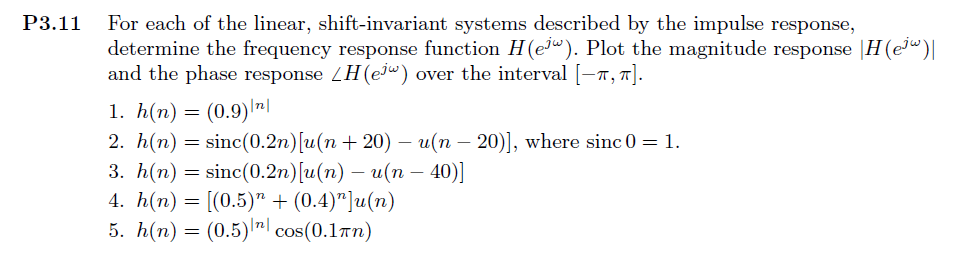

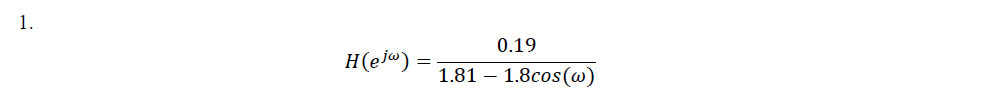

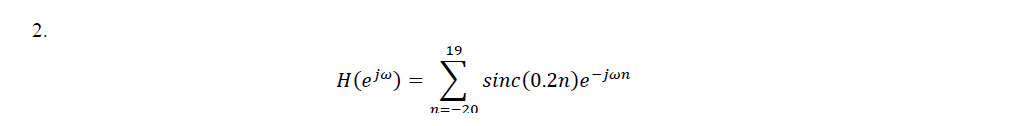

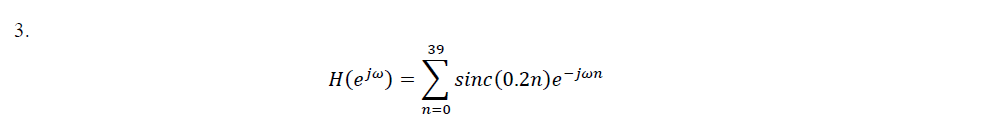

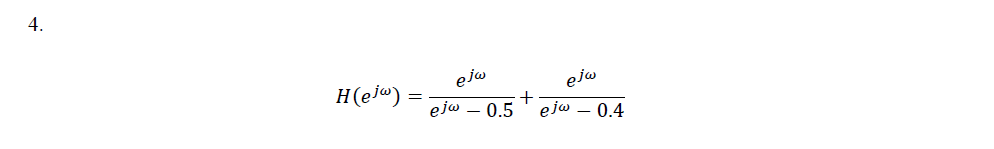

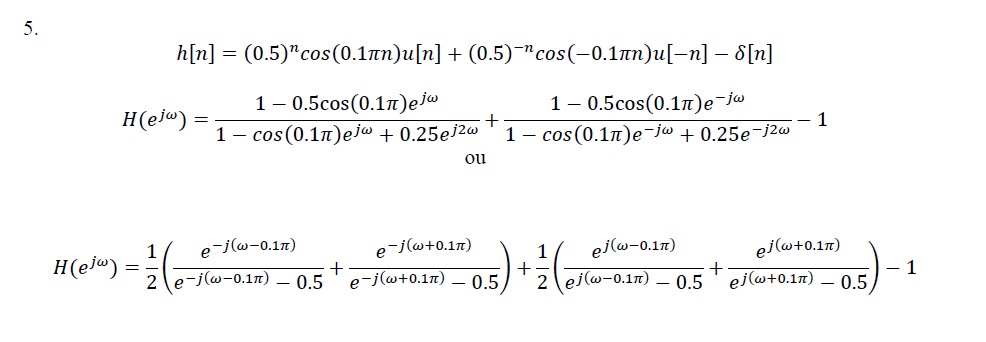

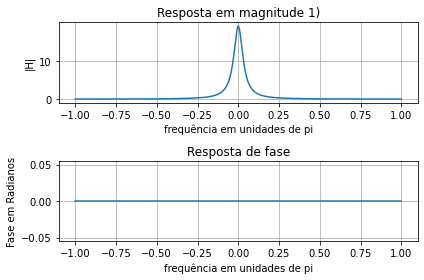

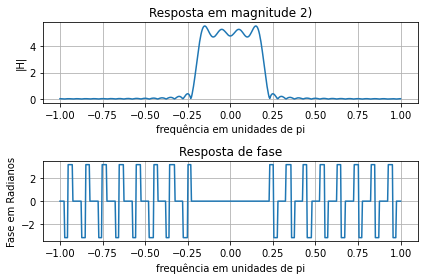

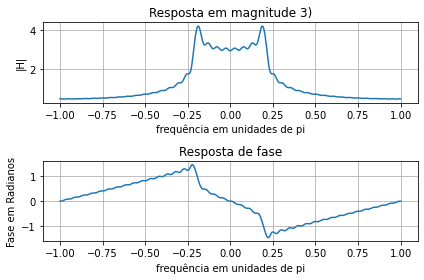

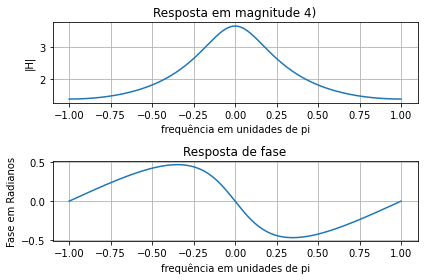

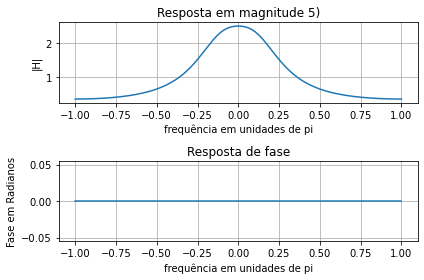

In [2]:
import matplotlib.pyplot as plt
#from fDSP import impseq,stepseq,sigadd,sigmult,sigshift,sigfold
import numpy as np

# exercicio P3.11


# 1)

w = np.arange(-250,251)*np.pi/250  # [-pi, pi] axis divided into 501 points
X = 0.19*np.ones(501)/(1.81*np.ones(501) - 1.8*np.cos(w))

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("Resposta em magnitude 1)")
axs[0].plot(w/np.pi,np.abs(X))
axs[0].grid()
axs[0].set_xlabel("frequência em unidades de pi")
axs[0].set_ylabel('|H|')

axs[1].set_title("Resposta de fase")
axs[1].plot(w/np.pi,np.angle(X))
axs[1].grid()
axs[1].set_xlabel("frequência em unidades de pi")
axs[1].set_ylabel('Fase em Radianos')

fig.tight_layout()

# 2)


n = np.arange(-20,20)
x = np.sinc(0.2*n)      # sequence x(n)
k = np.arange(-250,251)
w = (np.pi/250)*k       # [-pi, pi] axis divided into 501 points

X = [x] @ ((np.exp(-1j*np.pi/250)) ** (np.transpose([n])@[k]))
X=X[0]

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("Resposta em magnitude 2)")
axs[0].plot(w/np.pi,np.abs(X))
axs[0].grid()
axs[0].set_xlabel("frequência em unidades de pi")
axs[0].set_ylabel('|H|')

axs[1].set_title("Resposta de fase")
axs[1].plot(w/np.pi,np.angle(X))
axs[1].grid()
axs[1].set_xlabel("frequência em unidades de pi")
axs[1].set_ylabel('Fase em Radianos')

fig.tight_layout()

# 3)

n = np.arange(0,40)
x = np.sinc(0.2*n)      # sequence x(n)
k = np.arange(-250,251)
w = (np.pi/250)*k       # [-pi, pi] axis divided into 501 points

X = [x] @ ((np.exp(-1j*np.pi/250)) ** (np.transpose([n])@[k]))
X=X[0]

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("Resposta em magnitude 3)")
axs[0].plot(w/np.pi,np.abs(X))
axs[0].grid()
axs[0].set_xlabel("frequência em unidades de pi")
axs[0].set_ylabel('|H|')

axs[1].set_title("Resposta de fase")
axs[1].plot(w/np.pi,np.angle(X))
axs[1].grid()
axs[1].set_xlabel("frequência em unidades de pi")
axs[1].set_ylabel('Fase em Radianos')

fig.tight_layout()


# 4)

w = np.arange(-250,251)*np.pi/250  # [-pi, pi] axis divided into 501 points
X1 = np.exp(1j*w) / (np.exp(1j*w) - 0.5*np.ones(501))
X2 = np.exp(1j*w) / (np.exp(1j*w) - 0.4*np.ones(501))
X = X1 + X2

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("Resposta em magnitude 4)")
axs[0].plot(w/np.pi,np.abs(X))
axs[0].grid()
axs[0].set_xlabel("frequência em unidades de pi")
axs[0].set_ylabel('|H|')

axs[1].set_title("Resposta de fase")
axs[1].plot(w/np.pi,np.angle(X))
axs[1].grid()
axs[1].set_xlabel("frequência em unidades de pi")
axs[1].set_ylabel('Fase em Radianos')

fig.tight_layout()

# 5)

w = np.arange(-250,251)*np.pi/250  # [-pi, pi] axis divided into 501 points
X1=(np.ones(501)-0.5*np.cos(0.1*np.pi)*np.exp(1j*w))/(np.ones(501)-np.cos(0.1*np.pi)*np.exp(1j*w)+0.25*np.exp(1j*w*2))
X2=(np.ones(501)-0.5*np.cos(0.1*np.pi)*np.exp(-1j*w))/(np.ones(501)-np.cos(0.1*np.pi)*np.exp(-1j*w)+0.25*np.exp(-1j*w*2))
X=X1+X2-1;

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("Resposta em magnitude 5)")
axs[0].plot(w/np.pi,np.abs(X))
axs[0].grid()
axs[0].set_xlabel("frequência em unidades de pi")
axs[0].set_ylabel('|H|')

axs[1].set_title("Resposta de fase")
axs[1].plot(w/np.pi,np.angle(X))
axs[1].grid()
axs[1].set_xlabel("frequência em unidades de pi")
axs[1].set_ylabel('Fase em Radianos')

fig.tight_layout()


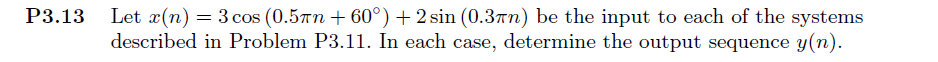

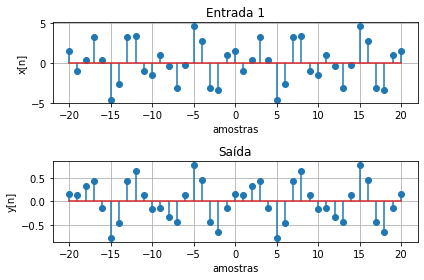

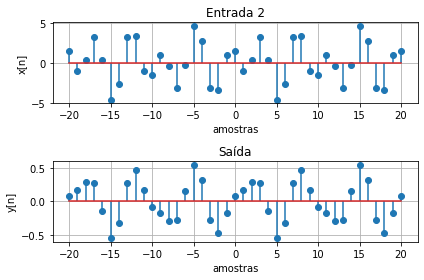

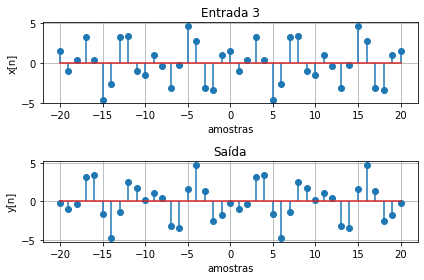

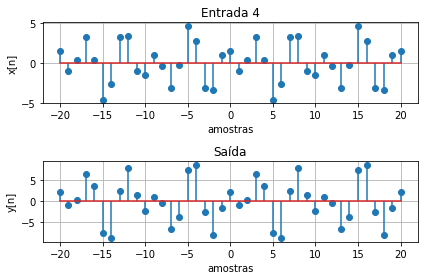

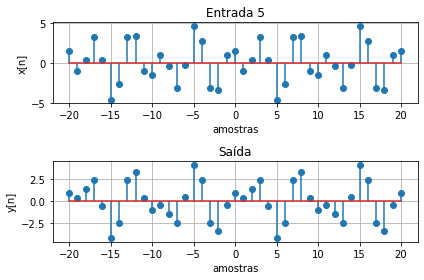

In [3]:
import matplotlib.pyplot as plt
#from fDSP import impseq,stepseq,sigadd,sigmult,sigshift,sigfold
import numpy as np

# exercicio P3.13


# 1)
w1=0.5*np.pi          # valor para uma frequencia específica
X1 = 0.19/(1.81 - 1.8*np.cos(w1))
magX1 = np.abs(X1)
angX1 = np.angle(X1)

w2=0.3*np.pi          # valor para uma frequencia específica
X2 = 0.19/(1.81 - 1.8*np.cos(w2))
magX2 = np.abs(X2)
angX2 = np.angle(X2)

n = np.arange(-20,21)
x=3*np.cos(0.5*np.pi*n+np.pi/3)+2*np.sin(0.3*np.pi*n)
y=3*magX1*np.cos(0.5*np.pi*n+np.pi/3+angX1)+2*magX2*np.sin(0.3*np.pi*n+angX2)

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("Entrada 1")
axs[0].stem(n,x)
axs[0].grid()
axs[0].set_xlabel("amostras")
axs[0].set_ylabel('x[n]')

axs[1].set_title("Saída")
axs[1].stem(n,y)
axs[1].grid()
axs[1].set_xlabel("amostras")
axs[1].set_ylabel('y[n]')

fig.tight_layout()

# 2)

n = np.arange(-20,20)
x = np.sinc(0.2*n)      # sequence x(n)
k = 250*0.5             # valor para uma frequencia específica  (0.5pi)
w = (np.pi/250)*k       # [-pi, pi] axis divided into 501 points

X = [x] @ ((np.exp(-1j*np.pi/250)) ** (np.transpose([n])@[k]))
X=X[0]

magX1 = np.abs(X)
angX1 = np.angle(X)

k = 250*0.3             # valor para uma frequencia específica  (0.3pi)
w = (np.pi/250)*k       # [-pi, pi] axis divided into 501 points

X = [x] @ ((np.exp(-1j*np.pi/250)) ** (np.transpose([n])@[k]))
X=X[0]

magX2 = np.abs(X)
angX2 = np.angle(X)

n = np.arange(-20,21)
x=3*np.cos(0.5*np.pi*n+np.pi/3)+2*np.sin(0.3*np.pi*n)
y=3*magX1*np.cos(0.5*np.pi*n+np.pi/3+angX1)+2*magX2*np.sin(0.3*np.pi*n+angX2)

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("Entrada 2")
axs[0].stem(n,x)
axs[0].grid()
axs[0].set_xlabel("amostras")
axs[0].set_ylabel('x[n]')

axs[1].set_title("Saída")
axs[1].stem(n,y)
axs[1].grid()
axs[1].set_xlabel("amostras")
axs[1].set_ylabel('y[n]')

fig.tight_layout()

# 3)

n = np.arange(0,40)
x = np.sinc(0.2*n)      # sequence x(n)
k = 250*0.5             # valor para uma frequencia específica  (0.5pi)
w = (np.pi/250)*k       # [-pi, pi] axis divided into 501 points

X = [x] @ ((np.exp(-1j*np.pi/250)) ** (np.transpose([n])@[k]))
X=X[0]

magX1 = np.abs(X)
angX1 = np.angle(X)

k = 250*0.3             # valor para uma frequencia específica  (0.3pi)
w = (np.pi/250)*k       # [-pi, pi] axis divided into 501 points

X = [x] @ ((np.exp(-1j*np.pi/250)) ** (np.transpose([n])@[k]))
X=X[0]

magX2 = np.abs(X)
angX2 = np.angle(X)

n = np.arange(-20,21)
x=3*np.cos(0.5*np.pi*n+np.pi/3)+2*np.sin(0.3*np.pi*n)
y=3*magX1*np.cos(0.5*np.pi*n+np.pi/3+angX1)+2*magX2*np.sin(0.3*np.pi*n+angX2)

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("Entrada 3")
axs[0].stem(n,x)
axs[0].grid()
axs[0].set_xlabel("amostras")
axs[0].set_ylabel('x[n]')

axs[1].set_title("Saída")
axs[1].stem(n,y)
axs[1].grid()
axs[1].set_xlabel("amostras")
axs[1].set_ylabel('y[n]')

fig.tight_layout()


# 4)
w1=0.5*np.pi          # valor para uma frequencia específica
X1 = (np.exp(1j*w1) / (np.exp(1j*w1) - 0.5))+(np.exp(1j*w1) / (np.exp(1j*w1) - 0.4))
magX1 = np.abs(X1)
angX1 = np.angle(X1)

w2=0.3*np.pi          # valor para uma frequencia específica
X2 = (np.exp(1j*w2) / (np.exp(1j*w2) - 0.5))+(np.exp(1j*w2) / (np.exp(1j*w2) - 0.4))
magX2 = np.abs(X2)
angX2 = np.angle(X2)

n = np.arange(-20,21)
x=3*np.cos(0.5*np.pi*n+np.pi/3)+2*np.sin(0.3*np.pi*n)
y=3*magX1*np.cos(0.5*np.pi*n+np.pi/3+angX1)+2*magX2*np.sin(0.3*np.pi*n+angX2)

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("Entrada 4")
axs[0].stem(n,x)
axs[0].grid()
axs[0].set_xlabel("amostras")
axs[0].set_ylabel('x[n]')

axs[1].set_title("Saída")
axs[1].stem(n,y)
axs[1].grid()
axs[1].set_xlabel("amostras")
axs[1].set_ylabel('y[n]')

fig.tight_layout()

# 5)
w1=0.5*np.pi          # valor para uma frequencia específica
X1a=(1-0.5*np.cos(0.1*np.pi)*np.exp(1j*w1))/(1-np.cos(0.1*np.pi)*np.exp(1j*w1)+0.25*np.exp(1j*w1*2))
X1b=(1-0.5*np.cos(0.1*np.pi)*np.exp(-1j*w1))/(1-np.cos(0.1*np.pi)*np.exp(-1j*w1)+0.25*np.exp(-1j*w1*2))
X1=X1a+X1b-1
magX1 = np.abs(X1)
angX1 = np.angle(X1)

w2=0.3*np.pi          # valor para uma frequencia específica
X2a=(1-0.5*np.cos(0.1*np.pi)*np.exp(1j*w2))/(1-np.cos(0.1*np.pi)*np.exp(1j*w2)+0.25*np.exp(1j*w2*2))
X2b=(1-0.5*np.cos(0.1*np.pi)*np.exp(-1j*w2))/(1-np.cos(0.1*np.pi)*np.exp(-1j*w2)+0.25*np.exp(-1j*w2*2))
X2=X2a+X2b-1
magX2 = np.abs(X2)
angX2 = np.angle(X2)

n = np.arange(-20,21)
x=3*np.cos(0.5*np.pi*n+np.pi/3)+2*np.sin(0.3*np.pi*n)
y=3*magX1*np.cos(0.5*np.pi*n+np.pi/3+angX1)+2*magX2*np.sin(0.3*np.pi*n+angX2)

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("Entrada 5")
axs[0].stem(n,x)
axs[0].grid()
axs[0].set_xlabel("amostras")
axs[0].set_ylabel('x[n]')

axs[1].set_title("Saída")
axs[1].stem(n,y)
axs[1].grid()
axs[1].set_xlabel("amostras")
axs[1].set_ylabel('y[n]')

fig.tight_layout()


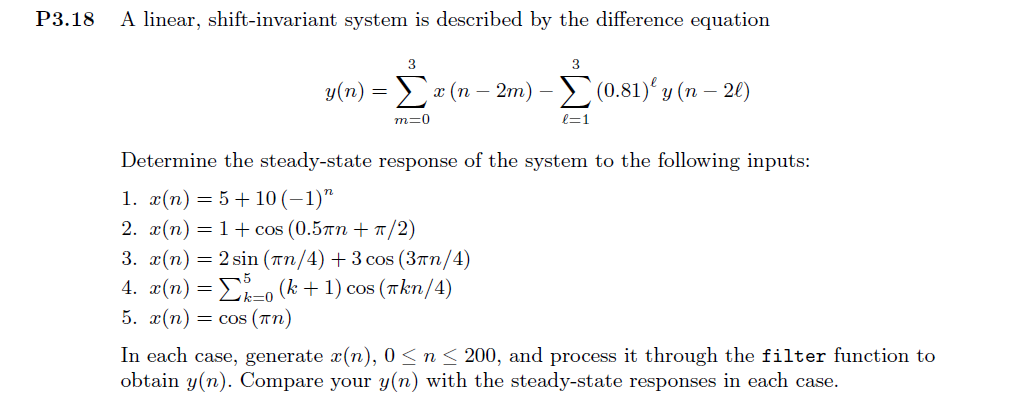

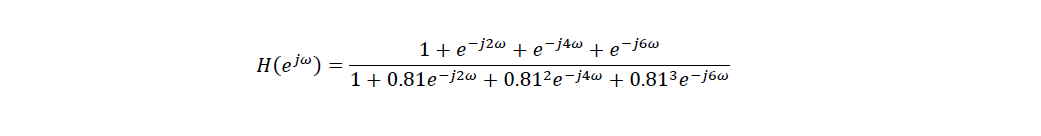

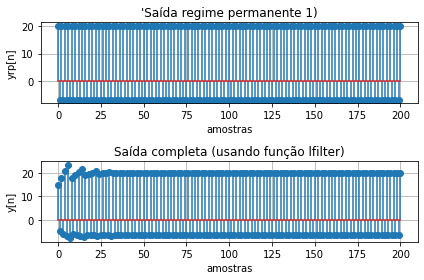

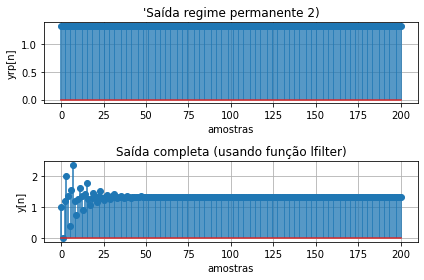

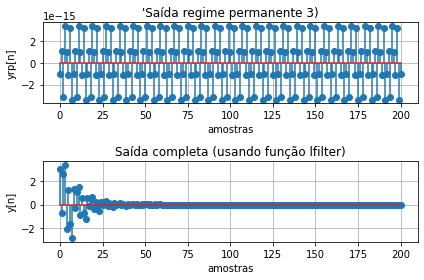

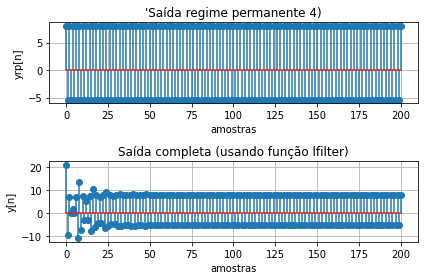

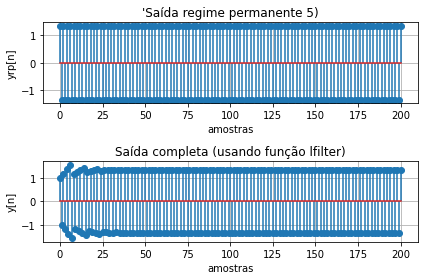

In [4]:
import matplotlib.pyplot as plt
#from fDSP import impseq,stepseq,sigadd,sigmult,sigshift,sigfold
import numpy as np
from scipy import signal

# exercicio P3.18


# 1)

w1=0.0*np.pi          # valor para uma frequencia específica
H1 = (1 + np.exp(-2*1j*w1) + np.exp(-4*1j*w1) + np.exp(-6*1j*w1) )/ (1 + 0.81*np.exp(-2*1j*w1) + (0.81**2)*np.exp(-4*1j*w1) + (0.81**3)*np.exp(-6*1j*w1))
magH1 = np.abs(H1)
#angH1 = np.angle(H1)

w2=1.0*np.pi          # valor para uma frequencia específica
H2 = (1 + np.exp(-2*1j*w2) + np.exp(-4*1j*w2) + np.exp(-6*1j*w2) )/ (1 + 0.81*np.exp(-2*1j*w2) + (0.81**2)*np.exp(-4*1j*w2) + (0.81**3)*np.exp(-6*1j*w2))
magH2 = np.abs(H2)
angH2 = np.angle(H2)

n = np.arange(0,201)
x = 5 + 10*np.cos(n*np.pi)
yrp = 5*magH1 + 10*magH2*np.cos(n*np.pi+angH2)     # y[n] regime permanente

b = np.array([1,0,1,0,1,0,1])
a = np.array([1,0,0.81,0,0.81**2,0,0.81**3])
y=signal.lfilter(b,a,x)                           # y[n] (transitorio + permanente)

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("'Saída regime permanente 1)")
axs[0].stem(n,yrp)
axs[0].grid()
axs[0].set_xlabel("amostras")
axs[0].set_ylabel('yrp[n]')

axs[1].set_title("Saída completa (usando função lfilter)")
axs[1].stem(n,y)
axs[1].grid()
axs[1].set_xlabel("amostras")
axs[1].set_ylabel('y[n]')

fig.tight_layout()

# 2)

w1=0.0*np.pi          # valor para uma frequencia específica
H1 = (1 + np.exp(-2*1j*w1) + np.exp(-4*1j*w1) + np.exp(-6*1j*w1) )/ (1 + 0.81*np.exp(-2*1j*w1) + (0.81**2)*np.exp(-4*1j*w1) + (0.81**3)*np.exp(-6*1j*w1))
magH1 = np.abs(H1)
#angH1 = np.angle(H1)

w2=0.5*np.pi          # valor para uma frequencia específica
H2 = (1 + np.exp(-2*1j*w2) + np.exp(-4*1j*w2) + np.exp(-6*1j*w2) )/ (1 + 0.81*np.exp(-2*1j*w2) + (0.81**2)*np.exp(-4*1j*w2) + (0.81**3)*np.exp(-6*1j*w2))
magH2 = np.abs(H2)
angH2 = np.angle(H2)

n = np.arange(0,201)
x = 1 + np.cos(0.5*np.pi*n+np.pi/2)
yrp = 1*magH1 + magH2*np.cos(0.5*np.pi*n+np.pi/2+angH2)    # y[n] regime permanente

b = np.array([1,0,1,0,1,0,1])
a = np.array([1,0,0.81,0,0.81**2,0,0.81**3])
y=signal.lfilter(b,a,x)                           # y[n] (transitorio + permanente)

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("'Saída regime permanente 2)")
axs[0].stem(n,yrp)
axs[0].grid()
axs[0].set_xlabel("amostras")
axs[0].set_ylabel('yrp[n]')

axs[1].set_title("Saída completa (usando função lfilter)")
axs[1].stem(n,y)
axs[1].grid()
axs[1].set_xlabel("amostras")
axs[1].set_ylabel('y[n]')

fig.tight_layout()

# 3)

w1=(1/4)*np.pi          # valor para uma frequencia específica
H1 = (1 + np.exp(-2*1j*w1) + np.exp(-4*1j*w1) + np.exp(-6*1j*w1) )/ (1 + 0.81*np.exp(-2*1j*w1) + (0.81**2)*np.exp(-4*1j*w1) + (0.81**3)*np.exp(-6*1j*w1))
magH1 = np.abs(H1)
angH1 = np.angle(H1)

w2=(3/4)*np.pi          # valor para uma frequencia específica
H2 = (1 + np.exp(-2*1j*w2) + np.exp(-4*1j*w2) + np.exp(-6*1j*w2) )/ (1 + 0.81*np.exp(-2*1j*w2) + (0.81**2)*np.exp(-4*1j*w2) + (0.81**3)*np.exp(-6*1j*w2))
magH2 = np.abs(H2)
angH2 = np.angle(H2)

n = np.arange(0,201)
x = 2*np.sin(np.pi*n/4) + 3*np.cos(3*np.pi*n/4)
yrp = 2*magH1*np.sin(np.pi*n/4+angH1) + 3*magH2*np.cos(3*np.pi*n/4+angH2)    # y[n] regime permanente

b = np.array([1,0,1,0,1,0,1])
a = np.array([1,0,0.81,0,0.81**2,0,0.81**3])
y=signal.lfilter(b,a,x)                           # y[n] (transitorio + permanente)

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("'Saída regime permanente 3)")
axs[0].stem(n,yrp)
axs[0].grid()
axs[0].set_xlabel("amostras")
axs[0].set_ylabel('yrp[n]')

axs[1].set_title("Saída completa (usando função lfilter)")
axs[1].stem(n,y)
axs[1].grid()
axs[1].set_xlabel("amostras")
axs[1].set_ylabel('y[n]')

fig.tight_layout()

# 4)

w1=0.0*np.pi          # valor para uma frequencia específica
H1 = (1 + np.exp(-2*1j*w1) + np.exp(-4*1j*w1) + np.exp(-6*1j*w1) )/ (1 + 0.81*np.exp(-2*1j*w1) + (0.81**2)*np.exp(-4*1j*w1) + (0.81**3)*np.exp(-6*1j*w1))
magH1 = np.abs(H1)
#angH1 = np.angle(H1)

w2=(1/4)*np.pi          # valor para uma frequencia específica
H2 = (1 + np.exp(-2*1j*w2) + np.exp(-4*1j*w2) + np.exp(-6*1j*w2) )/ (1 + 0.81*np.exp(-2*1j*w2) + (0.81**2)*np.exp(-4*1j*w2) + (0.81**3)*np.exp(-6*1j*w2))
magH2 = np.abs(H2)
angH2 = np.angle(H2)

w3=(2/4)*np.pi          # valor para uma frequencia específica
H3 = (1 + np.exp(-2*1j*w3) + np.exp(-4*1j*w3) + np.exp(-6*1j*w3) )/ (1 + 0.81*np.exp(-2*1j*w3) + (0.81**2)*np.exp(-4*1j*w3) + (0.81**3)*np.exp(-6*1j*w3))
magH3 = np.abs(H3)
angH3 = np.angle(H3)

w4=(3/4)*np.pi          # valor para uma frequencia específica
H4 = (1 + np.exp(-2*1j*w4) + np.exp(-4*1j*w4) + np.exp(-6*1j*w4) )/ (1 + 0.81*np.exp(-2*1j*w4) + (0.81**2)*np.exp(-4*1j*w4) + (0.81**3)*np.exp(-6*1j*w4))
magH4 = np.abs(H4)
angH4 = np.angle(H4)

w5=1.0*np.pi          # valor para uma frequencia específica
H5 = (1 + np.exp(-2*1j*w5) + np.exp(-4*1j*w5) + np.exp(-6*1j*w5) )/ (1 + 0.81*np.exp(-2*1j*w5) + (0.81**2)*np.exp(-4*1j*w5) + (0.81**3)*np.exp(-6*1j*w5))
magH5 = np.abs(H5)
angH5 = np.angle(H5)

w6=(5/4)*np.pi          # valor para uma frequencia específica
H6 = (1 + np.exp(-2*1j*w6) + np.exp(-4*1j*w6) + np.exp(-6*1j*w6) )/ (1 + 0.81*np.exp(-2*1j*w6) + (0.81**2)*np.exp(-4*1j*w6) + (0.81**3)*np.exp(-6*1j*w6))
magH6 = np.abs(H6)
angH6 = np.angle(H6)

n = np.arange(0,201)
x = 1 + 2*np.cos(np.pi*n/4) + 3*np.cos(np.pi*2*n/4) + 4*np.cos(np.pi*3*n/4) + 5*np.cos(np.pi*4*n/4) + 6*np.cos(np.pi*5*n/4)
yrp = 1*magH1 + 2*magH2*np.cos(np.pi*n/4 + angH2) + 3*magH3*np.cos(np.pi*2*n/4 + angH3) + 4*magH4*np.cos(np.pi*3*n/4 + angH4) + 5*magH5*np.cos(np.pi*4*n/4 + angH5) + 6*magH6*np.cos(np.pi*5*n/4 + angH6)    # y[n] regime permanente

b = np.array([1,0,1,0,1,0,1])
a = np.array([1,0,0.81,0,0.81**2,0,0.81**3])
y=signal.lfilter(b,a,x)                           # y[n] (transitorio + permanente)

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("'Saída regime permanente 4)")
axs[0].stem(n,yrp)
axs[0].grid()
axs[0].set_xlabel("amostras")
axs[0].set_ylabel('yrp[n]')

axs[1].set_title("Saída completa (usando função lfilter)")
axs[1].stem(n,y)
axs[1].grid()
axs[1].set_xlabel("amostras")
axs[1].set_ylabel('y[n]')

fig.tight_layout()


# 5)

w1=1.0*np.pi          # valor para uma frequencia específica
H1 = (1 + np.exp(-2*1j*w1) + np.exp(-4*1j*w1) + np.exp(-6*1j*w1) )/ (1 + 0.81*np.exp(-2*1j*w1) + (0.81**2)*np.exp(-4*1j*w1) + (0.81**3)*np.exp(-6*1j*w1))
magH1 = np.abs(H1)
angH1 = np.angle(H1)

n = np.arange(0,201)
x = np.cos(np.pi*n)
yrp = magH1*np.cos(np.pi*n+angH1)    # y[n] regime permanente

b = np.array([1,0,1,0,1,0,1])
a = np.array([1,0,0.81,0,0.81**2,0,0.81**3])
y=signal.lfilter(b,a,x)                           # y[n] (transitorio + permanente)

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].set_title("'Saída regime permanente 5)")
axs[0].stem(n,yrp)
axs[0].grid()
axs[0].set_xlabel("amostras")
axs[0].set_ylabel('yrp[n]')

axs[1].set_title("Saída completa (usando função lfilter)")
axs[1].stem(n,y)
axs[1].grid()
axs[1].set_xlabel("amostras")
axs[1].set_ylabel('y[n]')

fig.tight_layout()